In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modules import sig_tests as sig
import scipy.stats as stats
import os

%matplotlib inline

# Purpose of this Notebook

Investigate two methods of significance testing through the lens of marketing program optimization. The two methods are:

1. **Two-Tailed** test to see if treatment sample mean **is different** from control sample mean
2. **One-Tailed** test to see if there is a **positive difference** between treatment sample mean and control sample mean

The difference between those two methods seems like nuance. But it's theoretically huge.

In the first case, my implicit assumption is that the control group yielded its true mean during the experiment time frame. I establish a null hypothesis based around the control group's mean. Then, I contrast the treatment's mean with the control's mean to see if the treatment's mean is random, assuming the control mean is the true mean.

I also reject the null when a treatment underperforms the control. In reality, we wouldn't adopt a new idea if that happened. So, its external validity is low.

In the second case, my implicit assumption is that there is 0 difference between the control group's mean and the treatment group's mean. My null hypothesis is then based around a mean difference of 0. Then, I contrast the observed mean difference with the assumed difference of 0 and see if our observed difference occurred by chance or not.

I also reject the null only when the treatment outperforms the control. This more accurately reflects marketing decision making in the real world. A new idea is only getting adopted when it **beats** status quo.

## The implication is really about maximizing external validity

In both cases, the test is structured to measure what it purports to measure **within the sample**, so internal validty is high. 

In case one, I'm able to demonstrate that my treatment mean is likley different from my control mean. 

In case two, I'm able to demonstrate that my sample does or doesn't show a significant positive difference between the two means (treatment - control).

However, case 1 assumes that I didn't get the control mean by random chance. That it represents the population mean without the treatment. This reduces external validity. It forgets about biases involving the sample and time.

## And I want to answer this question

What would have to be the case for both to yield materially different results? (Results that change the decision being made)

# Part 0: Define Global Parameters
1. Control probability
2. Treatment probability
3. Group size (assume 50/50 split, so sample is 2x group_size)
4. Count of simulation runs

In [4]:
# Define behavior rates
control_size = 2863
treatment_size = 2863

prob_control = 0.1
prob_treatment = 0.12

# Part 1: Two-Tailed Test Contrasting Sample Means

Null Hypothesis: Treatment mean is not different than control mean. (Treatment conversion rate is same as control conversion rate)

Alt Hypothesis: Treatment mean is different than control mean. (Treatment conversion rate is different than control conversion rate)

In [3]:
## PSEUDO CODE

# Simulate distribution under null (treatment is not different than null) 
# Random draw 1 or 0 weighted for control conv rate 200,000 times

# Define extremeties using conversion rate of treatment (upper extreme, lower extreme)

# Measure % of null cases above and below those two extremes. That's p, baby.

P Value: 0.000154


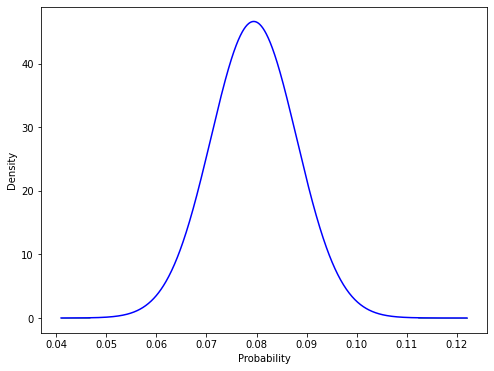

In [3]:
fig_a, ax_a, p_a = sig.simulation_a(prob_control, prob_treatment, plot = True)

Z Score: 3.832851649347667
P Value: 0.00012666634585478675


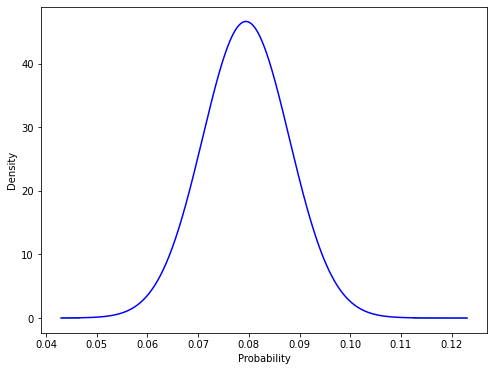

In [4]:
p_a_analytic = sig.analytic_a(prob_control, prob_treatment, plot = True)

# Part 2: One-Tailed Test Contrasting Presumed and Observed Differences

Difference = Treatment - Control

Null Hypothesis: The difference between the control conversion rate and treatment conversion rate is 0 or less.

Alt Hypothesis: The difference between the control conversion rate the treatment conversion rate is greater than 0.

Same procedure as above, with a few key differences:

1. Simulate treatment - control **differences** rather than control probabilities
2. One-tailed, so just need upper extremity and upper proportion for P value

Observed Difference: 0.0328
P Value: 0.039102


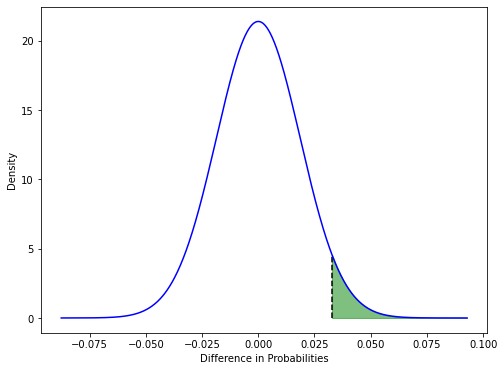

In [5]:
fig_b, ax_b, p_b = sig.simulation_b(prob_control, prob_treatment, control_size, treatment_size, runs = 500000, plot = True)

Z Score: 2.418434479569665
P Value: 0.007793726228646269


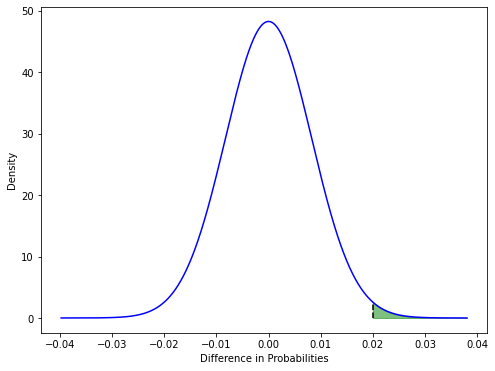

In [5]:
p_b_analytic = sig.analytic_b(prob_control, prob_treatment, control_size, treatment_size, plot = True)

# Part 3: When do the methods conclude differently?